In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Data managment
## input
df = pd.read_csv("data/train.csv")

## grouping into int categories
df["Sex"] = df["Sex"].replace({"male":0, "female":1})
df["Embarked"] = df["Embarked"].replace({'C':0, 'S':1, 'Q':2})
df["Cabin"] = df["Cabin"].apply(lambda x: 0 if x is np.nan else 1)

## handling names
title_dict = {"Mr.":1, "Mrs.":2, "Mme.":2, "Miss.":3, "Mlle.":3, "Master.":4, "Dr.":5, "Rev.": 6}

def name_lookup(name_str):
    for word in name_str.split():
        if word in title_dict.keys():
            return title_dict[word]
    return 0

df["Name"] = df["Name"].apply(name_lookup)

## handling nans
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])

## creating categories for floats
df.loc[df["Age"] <= 1, "Age"] = 0
df.loc[(df["Age"] > 1) & (df["Age"] <= 6), "Age"] = 1
df.loc[(df["Age"] > 6) & (df["Age"] <= 16), "Age"] = 2
df.loc[(df["Age"] > 16) & (df["Age"] <= 26), "Age"] = 3
df.loc[(df["Age"] > 26) & (df["Age"] <= 50), "Age"] = 4
df.loc[df["Age"] > 50, "Age"] = 5
print((df["Age"] == 3).sum())

## creating input and output dataframes
yf = df["Survived"]
Xf = df.drop(columns=["PassengerId", "Survived", "Ticket"])
print(Xf.head())

219
   Pclass  Name  Sex  Age  SibSp  Parch     Fare  Cabin  Embarked
0       3     1    0  3.0      1      0   7.2500      0       1.0
1       1     2    1  4.0      1      0  71.2833      1       0.0
2       3     3    1  3.0      0      0   7.9250      0       1.0
3       1     2    1  4.0      1      0  53.1000      1       1.0
4       3     1    0  4.0      0      0   8.0500      0       1.0


In [3]:
## decision tree calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
clf_tree = DecisionTreeClassifier()

frac_train = 0.75
m, n = Xf.shape
frac_tot_arr = np.linspace(0.05, 1, 401)
score_train_arr_tree, score_test_arr_tree = [], []
for frac_tot in frac_tot_arr:
    print("#"*int(100*frac_tot), "{0:.0f}%".format(100*frac_tot), end='\r')
    # randomly choosing samples and splitting into train and test
    Xnp_train, Xnp_test, ynp_train, ynp_test = \
        train_test_split(Xf, yf, test_size=frac_tot*(1-frac_train), train_size=frac_tot*frac_train)
    # training
    clf_tree = clf_tree.fit(Xnp_train, ynp_train)
    # evaluating
    score_train_arr_tree.append(accuracy_score(clf_tree.predict(Xnp_train), ynp_train))
    score_test_arr_tree.append(accuracy_score(clf_tree.predict(Xnp_test), ynp_test))

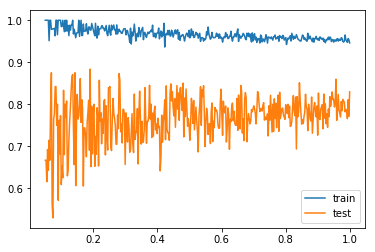

Final accuracy for decision tree 0.8295964125560538


In [5]:
## Logistic regression plotting
fig, fax = plt.subplots()
fax.plot(frac_tot_arr, score_train_arr_tree, label="train")
fax.plot(frac_tot_arr, score_test_arr_tree, label="test")
plt.legend()
plt.show()
print("Final accuracy for decision tree", accuracy_score(clf_tree.predict(Xnp_test), ynp_test))